# Summary of ICLR paper, links, getting started, direction to contact sales if interested in higher res data, uncertainty, new areas, etc.

### Import necessary packages

In [8]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Load carbon project data 
The satellite observed wildfire activity, AI-predicted historical probability, and AI-predicted future probabilities under different SSPs have all been aggregated to decadal averages. **If interested in 1) Monthly or annualized data, 2) Precise map views of the results at high (300m-500m) spatial resolution, or 3) Uncertainty bounds for projections, please contact us.**  

Columns are:

- 'Entity Name': Publicly available project code. VCS = Verra Carbon Standard, ACR = American Carbon Registry, CAR = Carbon Action Reserve 
- 'lat': approx centroid latitude of the polygon. Values in -90 to 90.
- 'lng': approx centroid longitude of the polygon. Values in -180 to 180.
- 'geometry': polygon geometry for each project. Can be either single polygons or multipolygons.
- 'observed_burn_2010_2021': boolean whether fire was detected by satellite from 2010-2021. 
- 'burnprob_hist': Wilfire AI model predicted annual burn probability, averaged over the polygon area and averaged from 2010 to 2021. 
- 'burnprob_ *year* _ *ssp*': Wilfire AI model predicted annual burn probability, averaged over the polygon area and averaged from (year-5) to (year+5) for each ssp scenario in [ssp126, ssp245, ssp585]. For example, burnprob_2025_585 corresponds to the average predicted probablity from 2020-2030, inclusive, for the ssp585 scenario.  




In [9]:
gdf = gpd.read_file('../../data/carbon_projects/sustglobal_ICLR_2023_devcenter.gpkg')
gdf

,Entity Name,lat,lng,observed_burn_2010_2021,burnprob_hist,burnprob_2025_585,burnprob_2035_585,burnprob_2045_585,burnprob_2055_585,burnprob_2065_585,...,burnprob_2095_245,burnprob_2025_126,burnprob_2035_126,burnprob_2045_126,burnprob_2055_126,burnprob_2065_126,burnprob_2075_126,burnprob_2085_126,burnprob_2095_126,geometry
0,ACR360,62.093133,-144.957140,False,0.003188,0.003132,0.003293,0.003538,0.003747,0.004475,...,0.004940,0.003051,0.003521,0.003573,0.003389,0.003345,0.003550,0.003729,0.003574,"MULTIPOLYGON (((-144.12700 61.44520, -144.1270..."
1,ACR255,48.251012,-118.717251,True,0.008361,0.009272,0.009727,0.012838,0.022106,0.019906,...,0.023396,0.010795,0.008771,0.012675,0.008904,0.012024,0.014559,0.011668,0.012569,"MULTIPOLYGON (((-118.43640 47.88090, -118.4389..."
2,ACR273,43.142460,-121.823847,True,0.009703,0.011020,0.010143,0.011930,0.015504,0.014804,...,0.014703,0.009578,0.010007,0.011131,0.010320,0.012679,0.012221,0.011382,0.010843,"MULTIPOLYGON (((-121.00630 41.99830, -121.0063..."
3,CAR973,46.508794,-85.961377,False,0.000190,0.000212,0.000220,0.000250,0.000288,0.000319,...,0.000348,0.000185,0.000194,0.000217,0.000226,0.000239,0.000247,0.000259,0.000237,"MULTIPOLYGON (((-86.85580 46.28220, -86.85580 ..."
4,ACR274,42.161733,-122.107387,True,0.004807,0.005255,0.005149,0.005428,0.006370,0.006338,...,0.005977,0.004735,0.004967,0.005333,0.005178,0.005602,0.005810,0.005131,0.005378,"MULTIPOLYGON (((-122.22930 41.98250, -122.2291..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,VCS963,-8.971952,-69.493625,True,0.004504,0.004700,0.005130,0.006160,0.007030,0.007806,...,0.007134,0.004421,0.005071,0.005327,0.005469,0.006065,0.005860,0.005903,0.004805,"POLYGON ((-69.43708 -9.00498, -69.44612 -8.997..."
186,VCS977,-2.569448,-51.116873,False,0.001634,0.001678,0.001716,0.001839,0.002020,0.002145,...,0.002036,0.001668,0.001770,0.001713,0.001903,0.001746,0.001888,0.001824,0.001798,"MULTIPOLYGON (((-50.98288 -2.76712, -50.98376 ..."
187,VCS981,-2.037514,-51.294016,False,0.001464,0.001474,0.001509,0.001608,0.001719,0.001781,...,0.001732,0.001486,0.001548,0.001513,0.001635,0.001524,0.001642,0.001578,0.001555,"MULTIPOLYGON (((-51.42412 -2.29440, -51.42230 ..."
188,VCS985,-7.723984,-75.948281,False,0.000659,0.000663,0.000753,0.000860,0.001025,0.001244,...,0.001078,0.000652,0.000752,0.000793,0.000813,0.000890,0.000832,0.000813,0.000757,"MULTIPOLYGON (((-76.01407 -8.61581, -76.01434 ..."


## Plot global carbon project locations

([], [])

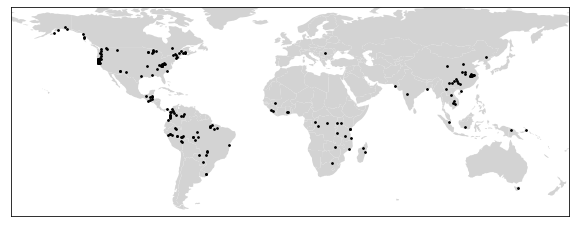

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
## See https://geopandas.org/en/stable/docs/user_guide/mapping.html for more examples
plot_gdf = gpd.GeoDataFrame(gdf.copy(), 
                            geometry = gpd.points_from_xy(gdf['lng'], gdf['lat']), 
                            crs = 'epsg:4326')
ax = plot_gdf.plot(color='black', markersize=3, zorder=2, figsize = (10,8))
world.plot(ax=ax, zorder=1, color = 'lightgrey')
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 75)
plt.xticks([]) 
plt.yticks([]) 
 


## Select a project_id for further examination


In [4]:
project_id = 'ACR273' # see 'Entity Name' column for list of valid options


In [5]:
gdf_project = gdf.loc[gdf['Entity Name'] == project_id]
gdf_project

,Entity Name,lat,lng,observed_burn_2010_2021,burnprob_hist,burnprob_2025_585,burnprob_2035_585,burnprob_2045_585,burnprob_2055_585,burnprob_2065_585,...,burnprob_2095_245,burnprob_2025_126,burnprob_2035_126,burnprob_2045_126,burnprob_2055_126,burnprob_2065_126,burnprob_2075_126,burnprob_2085_126,burnprob_2095_126,geometry
2,ACR273,43.14246,-121.823847,True,0.009703,0.01102,0.010143,0.01193,0.015504,0.014804,...,0.014703,0.009578,0.010007,0.011131,0.01032,0.012679,0.012221,0.011382,0.010843,"MULTIPOLYGON (((-121.00630 41.99830, -121.0063..."


<AxesSubplot:>

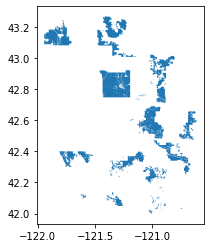

In [6]:
## Plot the project boundary
gdf_project.plot()

Text(0.5, 1.0, 'ACR273')

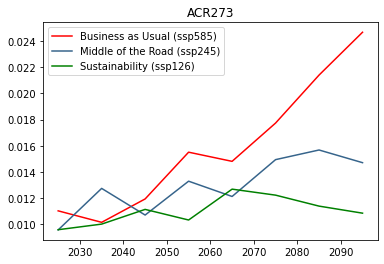

In [11]:
## Plot the decadal summaries of future change
## Annual and sub-annual data available upon request
## Uncertainty ranges available upon request
x_years = [2025, 2035, 2045, 2055, 2065, 2075, 2085, 2095]
y_585 = gdf_project[['burnprob_2025_585',
                    'burnprob_2035_585',
                    'burnprob_2045_585',
                    'burnprob_2055_585',
                    'burnprob_2065_585',
                    'burnprob_2075_585',
                    'burnprob_2085_585',
                    'burnprob_2095_585']]
y_245 = gdf_project[['burnprob_2025_245',
                     'burnprob_2035_245',
                     'burnprob_2045_245',
                     'burnprob_2055_245',
                     'burnprob_2065_245',
                     'burnprob_2075_245',
                     'burnprob_2085_245',
                     'burnprob_2095_245']]
y_126 = gdf_project[['burnprob_2025_126',
                     'burnprob_2035_126',
                     'burnprob_2045_126',
                     'burnprob_2055_126',
                     'burnprob_2065_126',
                     'burnprob_2075_126',
                     'burnprob_2085_126',
                     'burnprob_2095_126']]

plt.plot(x_years, y_585.values.flatten(), color = 'red', label = 'Business as Usual (ssp585)')
plt.plot(x_years, y_245.values.flatten(), color = '#36648b', label = 'Middle of the Road (ssp245)')
plt.plot(x_years, y_126.values.flatten(), color = 'green', label = 'Sustainability (ssp126)')
plt.legend()
plt.title(project_id)